# Fixed Effects

In [ ]:
from nilearn.glm.contrasts import compute_fixed_effects
from nilearn import plotting

for i in range(11, 21):
    contrast_imgs = []
    variance_imgs = []
    for j in range(1, 4):
        contrast_img = '/Users/bradpowell/Desktop/Plots/sub-' + str(i) + '/subject' + str(i) + '_run' + str(j) + '_effect_size.nii'
        variance_img = '/Users/bradpowell/Desktop/Plots/sub-' + str(i) + '/subject' + str(i) + '_run' + str(j) + '_effect_variance.nii'
        contrast_imgs.append(contrast_img)
        variance_imgs.append(variance_img)
    
    fixed_fx_contrast, fixed_fx_variance, fixed_fx_stat = compute_fixed_effects(
    contrast_imgs, variance_imgs)
    
    #plotting.plot_stat_map(fixed_fx_stat, threshold=3.0)
    
    fixed_fx_contrast.to_filename('sub-' + str(i) + '_run-all_effect_size')
    fixed_fx_variance.to_filename('sub-' + str(i) + '_run-all_effect_variance')     

# Random Effects

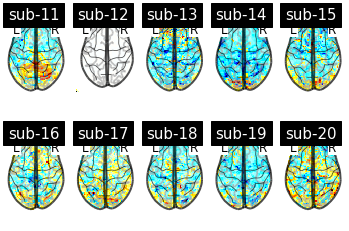

In [11]:
from nilearn import plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

subjects = []
for i in range(11, 21):
    subjects.append("sub-" + str(i))
    
data = []
for i in range(11, 21):
    data.append("/Users/bradpowell/Desktop/Combined Runs Per Subject Plots/sub-" + str(i) + "_run-all_effect_size.nii")

fig, axes = plt.subplots(nrows=2, ncols=5)
axes = axes.flatten()
for cidx, cmap in enumerate(data):
    plotting.plot_glass_brain(
        cmap,
        colorbar = False,
        title = subjects[cidx],
        axes = axes[cidx],
        plot_abs = False,
        display_mode = 'z',
    )
plt.show()

In [12]:
df = pd.DataFrame(dict(intercept = np.ones(len(subjects))))
df

,intercept
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [13]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(
    data,
    design_matrix=df,
)

In [14]:
z_map = second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='z_score',
)

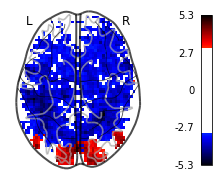

In [15]:
from scipy.stats import norm

p_val = 0.001
p001_unc = norm.isf(p_val)
display = plotting.plot_glass_brain(
    z_map,
    threshold=p001_unc,
    colorbar=True,
    display_mode='z',
    plot_abs=False,
)
plotting.show()
# Uncorrected p less than .001 = z +- 3.09